# Social Network Segmentation Analysis
In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.

Start by importing your libraries, loading the dataset and exploring its variables.
What features do you find? Do they have the correct datatypes?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer

import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('snsdata.csv')

In [4]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
data.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [6]:
data['gender'].fillna('other',inplace= True)

In [7]:
data['gender'] = np.where(data['gender'] == 'M', 0, 
                          (np.where(data['gender']=='F',1,2)))

## 1. Data Wrangling
If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.

Consider the some of these aspects:

Wrong data types
Null values
Consistency in categorical data

In [8]:
## remove extreme outliers

In [9]:
data['age'].dtype

dtype('float64')

In [10]:
for col in data.select_dtypes(include='number').columns:
    q25= np.quantile(data[col],0.25)
    q75= np.quantile(data[col],0.75)
    IQR= q75-q25
    mask= (data[col]>(q75+3*IQR)) | (data[col]>(q75-3*IQR))
    removed_out=data[mask]

In [11]:
removed_out.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,2,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
57,2006,0,18.924,5,0,0,0,0,0,0,...,0,2,1,1,0,0,1,0,0,2
67,2006,1,18.565,35,0,0,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
102,2006,1,NaN,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
115,2006,0,18.680,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
data.drop(columns='age', inplace=True)

## 2. Data Visualization
Now that the data is more or less fixed, plot some charts to understand better how it is composed:

Check distribution of variables - do we have outliers? What should we do with them?
Understand which features are correlated - do they represent the same? Which ones should we keep?
When we compare two variables, is it possible to see groups in the data?
Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?
Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [12]:
data.corr()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,0.030291,-0.108653,0.066851,0.072767,0.025213,0.058298,0.046433,0.061452,0.038754,...,0.010269,0.074370,0.042722,0.039899,0.060011,0.055192,0.014776,0.001536,-0.021476,0.008931
gender,0.030291,1.000000,-0.007323,0.029511,-0.041451,-0.121875,-0.004117,0.053210,0.046415,0.025230,...,0.009568,0.049139,0.119491,0.041793,0.033411,0.027661,-0.004006,-0.010014,-0.000865,-0.008935
age,-0.108653,-0.007323,1.000000,-0.014507,-0.020402,-0.016419,-0.008782,-0.016963,-0.015925,-0.004031,...,-0.002186,-0.020503,-0.027810,-0.021595,-0.007546,-0.011658,0.003557,-0.000724,0.000650,-0.001582
friends,0.066851,0.029511,-0.014507,1.000000,0.053052,0.031738,0.027402,0.055935,0.046853,0.029147,...,0.008502,0.066716,0.084627,0.026906,0.056240,0.057502,0.010432,0.026358,0.017036,-0.006960
basketball,0.072767,-0.041451,-0.020402,0.053052,1.000000,0.177333,0.071375,0.123884,0.136199,0.025810,...,0.018204,0.069477,0.073422,0.076253,0.036633,0.033880,0.020331,0.017815,0.021744,0.031330
football,0.025213,-0.121875,-0.016419,0.031738,0.177333,1.000000,0.063986,0.046312,0.058534,0.035534,...,0.033070,0.065207,0.056572,0.070793,0.063667,0.041708,0.023424,0.018757,0.038740,0.031675
soccer,0.058298,-0.004117,-0.008782,0.027402,0.071375,0.063986,1.000000,0.012366,0.029045,0.039001,...,0.015134,0.022723,0.054580,0.022189,0.029353,0.022757,0.008942,0.004957,0.009390,0.014844
softball,0.046433,0.053210,-0.016963,0.055935,0.123884,0.046312,0.012366,1.000000,0.115052,0.020749,...,0.006857,0.034093,0.050446,0.047182,0.024057,0.020079,0.012750,0.021312,0.008083,0.015096
volleyball,0.061452,0.046415,-0.015925,0.046853,0.136199,0.058534,0.029045,0.115052,1.000000,0.043515,...,0.008077,0.035103,0.077030,0.030456,0.041156,0.043096,0.003543,0.014249,0.004995,0.014548
swimming,0.038754,0.025230,-0.004031,0.029147,0.025810,0.035534,0.039001,0.020749,0.043515,1.000000,...,0.021183,0.045530,0.118624,0.071109,0.048956,0.056899,0.021548,0.017627,0.027838,0.032532


<AxesSubplot:>

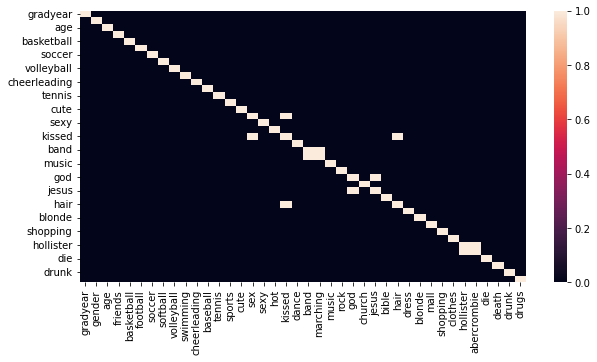

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()>0.3)

## 3. Feature Engineering
Based on your previous conclusions, perform transformations in your features. Think about:

Category Encoding
Outliers & Standardization
Dimension Reduction
Discard features that are less relevant to group the data
Why did you choose each method? Please explain your rationale.

In [15]:
## sample creation

socials_sample = data.sample(2000)

In [24]:
socials_sample.drop(columns='age', inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(socials_sample)
scaled_data=scaler.transform(socials_sample)

In [26]:
scaled_data

array([[-0.46869522,  0.16918547,  0.81917046, ...,  1.93246833,
        -0.22676529,  3.09367123],
       [ 1.31003428,  0.16918547,  0.61798482, ...,  1.93246833,
        -0.22676529, -0.19397088],
       [-1.35805997,  0.16918547, -0.8190555 , ...,  1.93246833,
         8.22411497, -0.19397088],
       ...,
       [ 0.42066953,  0.16918547,  1.85383949, ..., -0.2610258 ,
        -0.22676529, -0.19397088],
       [-1.35805997,  0.16918547,  0.0719095 , ..., -0.2610258 ,
        -0.22676529, -0.19397088],
       [-1.35805997,  0.16918547, -0.07179453, ..., -0.2610258 ,
        -0.22676529, -0.19397088]])

In [27]:
# PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)
reduced_data

array([[ 2.79122094, -1.75955222],
       [-0.44292803, -0.85409651],
       [ 2.5891801 ,  0.55345583],
       ...,
       [-0.70702622, -0.12310315],
       [ 0.59287521,  0.96040045],
       [-1.24831539, -0.53999342]])

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.manifold import MDS

In [32]:
scaled_data_df = pd.DataFrame(scaled_data, columns=socials_sample.columns)

In [33]:
hc_fit= AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward'
                               )

In [34]:
hc_fit.fit(scaled_data_df)

AgglomerativeClustering(n_clusters=5)

In [35]:
scaled_data_df['clu_ward']=[str(x) for x in hc_fit.labels_]
socials_sample['clu_ward']=[str(x) for x in hc_fit.labels_]

In [39]:
mds_fit=MDS(n_components=2)
socials_mca=pd.DataFrame(mds_fit.fit_transform(scaled_data), columns=['MC_0','MC_1'])


In [40]:
socials_mca.head()

,MC_0,MC_1
0,-6.995880,0.008417
1,-2.923132,-0.055432
2,-4.021490,-10.570051
3,-2.909043,-4.694379
4,6.803156,3.310978


<AxesSubplot:xlabel='MC_0', ylabel='MC_1'>

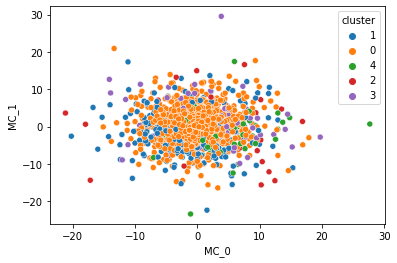

In [43]:
socials_mca['cluster']=[str(x) for x in hc_fit.labels_]
sns.scatterplot(data=socials_mca, x='MC_0', y='MC_1',hue='cluster')

In [44]:
## clustering

In [47]:
mds_fit2= MDS(n_components=2)
data_mca2=pd.DataFrame(mds_fit2.fit_transform(scaled_data),columns=['MC_0','MC_1'])
socials_mca_fin=pd.concat([socials_sample, data_mca2], axis=1)

<AxesSubplot:xlabel='MC_0', ylabel='MC_1'>

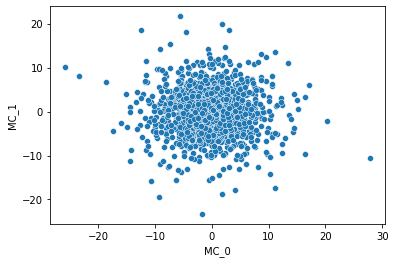

In [48]:
sns.scatterplot(data=socials_mca_fin, x='MC_0', y='MC_1')

## 4. Modeling
Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:

What model did you choose?
What is the optimal number of clusters?
Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [53]:
forcat=scaled_data_df.drop(columns='clu_ward')
forcat

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.468695,0.169185,0.819170,-0.359213,1.032793,-0.256184,-0.222525,-0.228185,-0.276501,-0.217405,...,-0.203793,1.212246,0.841032,-0.328754,3.002144,3.240487,-0.293016,1.932468,-0.226765,3.093671
1,1.310034,0.169185,0.617985,-0.359213,-0.376202,-0.256184,-0.222525,-0.228185,-0.276501,1.741200,...,-0.203793,1.212246,0.841032,-0.328754,-0.219041,-0.192232,-0.293016,1.932468,-0.226765,-0.193971
2,-1.358060,0.169185,-0.819055,-0.359213,-0.376202,0.831647,1.291252,1.193527,1.935504,-0.217405,...,-0.203793,1.212246,-0.495000,1.819966,-0.219041,-0.192232,-0.293016,1.932468,8.224115,-0.193971
3,-0.468695,0.169185,-0.272980,-0.359213,-0.376202,-0.256184,-0.222525,-0.228185,-0.276501,-0.217405,...,-0.203793,1.212246,0.841032,3.968686,3.002144,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971
4,-0.468695,-1.775475,-0.531647,2.105368,6.668771,-0.256184,-0.222525,-0.228185,-0.276501,-0.217405,...,-0.203793,-0.389136,-0.495000,-0.328754,-0.219041,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.310034,0.169185,-0.847796,-0.359213,1.032793,-0.256184,-0.222525,-0.228185,6.359515,-0.217405,...,-0.203793,1.212246,3.513097,-0.328754,-0.219041,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971
1996,0.420670,0.169185,0.215614,-0.359213,-0.376202,-0.256184,-0.222525,-0.228185,-0.276501,-0.217405,...,-0.203793,-0.389136,-0.495000,-0.328754,-0.219041,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971
1997,0.420670,0.169185,1.853839,-0.359213,-0.376202,-0.256184,1.291252,-0.228185,-0.276501,1.741200,...,-0.203793,-0.389136,-0.495000,-0.328754,-0.219041,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971
1998,-1.358060,0.169185,0.071909,-0.359213,-0.376202,-0.256184,-0.222525,-0.228185,-0.276501,-0.217405,...,-0.203793,-0.389136,-0.495000,1.819966,-0.219041,-0.192232,-0.293016,-0.261026,-0.226765,-0.193971


In [55]:
data_melt=scaled_data_df.melt(id_vars=['clu_ward'])
data_melt.head()

,clu_ward,variable,value
0,1,gradyear,-0.468695
1,0,gradyear,1.310034
2,0,gradyear,-1.358060
3,1,gradyear,-0.468695
4,0,gradyear,-0.468695


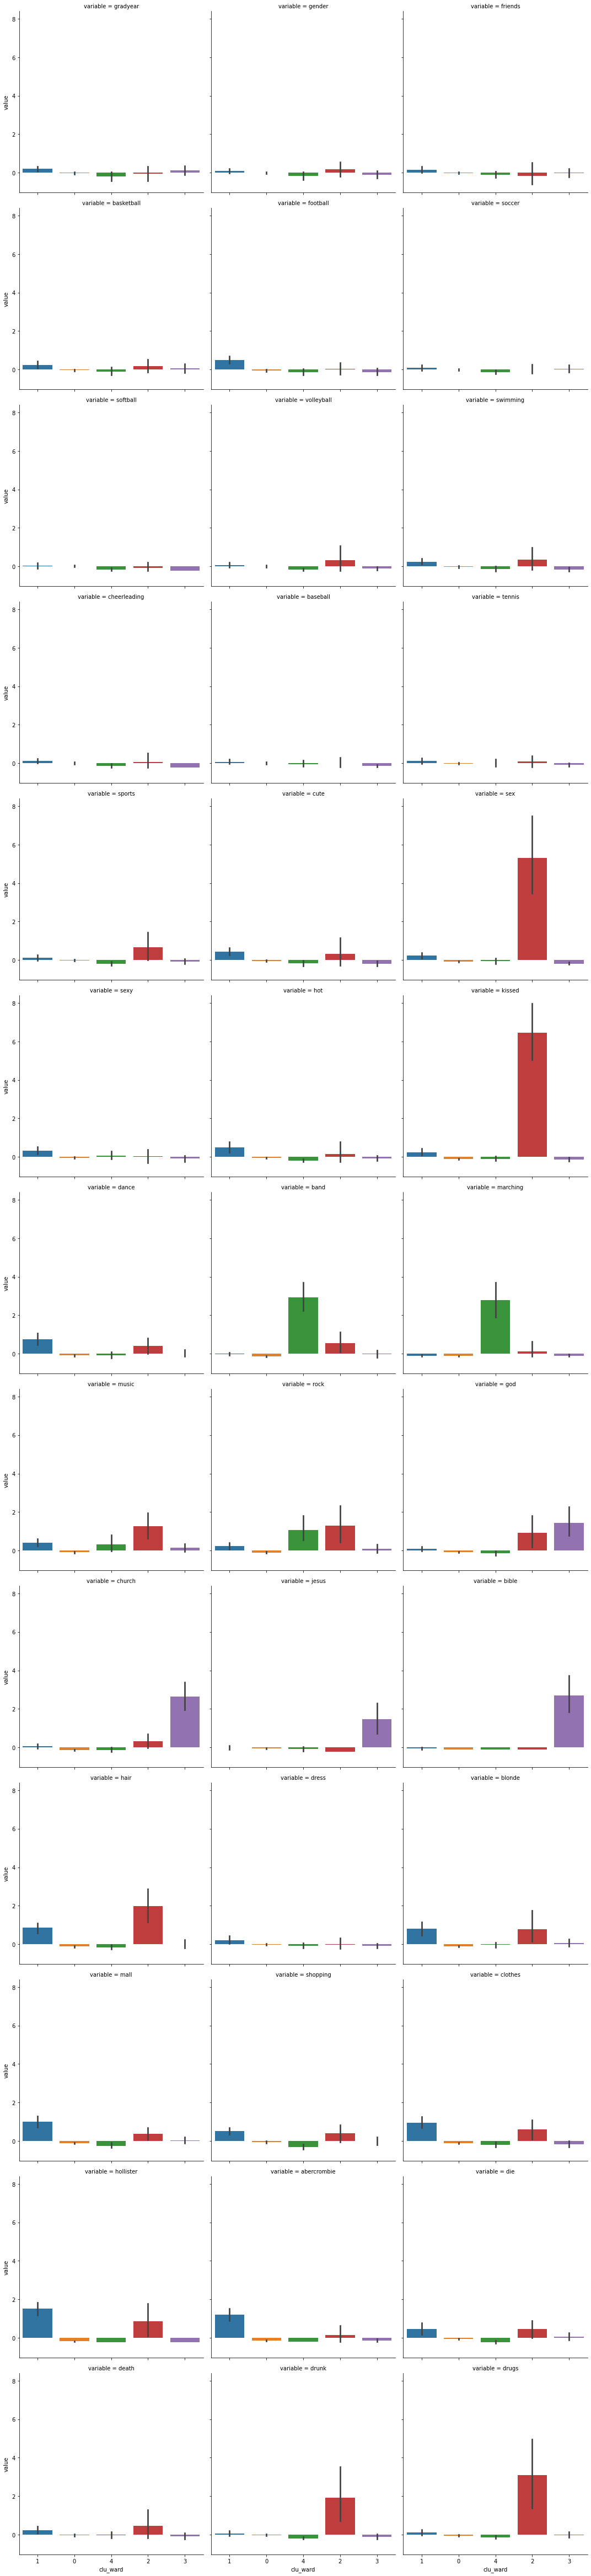

In [58]:
sns.catplot(data=data_melt , x='clu_ward' ,y='value', col='variable' , kind='bar', col_wrap=3 )

In [59]:
# the catplot was really the best method to be able to visualize the clustering, scatter plots were not doing much of it.
# as we can see the groups are pretty defined between 4 to 6 variables each, beign very accurrate with how coreralated they were  